In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
results = []
with open("../serial_collector/x.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONE) # change contents to floats
    for row in reader: # each row is a list
        results.append(row)

dataset = results
columns = ['action',
           'accelX1', 'accelY1', 'accelZ1', 'gyroX1', 'gyroY1', 'gyroZ1',
           'accelX2', 'accelY2', 'accelZ2', 'gyroX2', 'gyroY2', 'gyroZ2',
           'accelX3', 'accelY3', 'accelZ3', 'gyroX3', 'gyroY3', 'gyroZ3',
           'accelX4', 'accelY4', 'accelZ4', 'gyroX4', 'gyroY4', 'gyroZ4',
           'accelX5', 'accelY5', 'accelZ5', 'gyroX5', 'gyroY5', 'gyroZ5']
data = pd.DataFrame(data = dataset, columns = columns)
data

,action,accelX1,accelY1,accelZ1,gyroX1,gyroY1,gyroZ1,accelX2,accelY2,accelZ2,...,accelZ4,gyroX4,gyroY4,gyroZ4,accelX5,accelY5,accelZ5,gyroX5,gyroY5,gyroZ5
0,fel,0,0,0,0,0,0,-0.414642,-1.894158,-0.533440,...,0.669931,8.895879,5.114324,16.771049,0,0,0,0,0,0
1,fel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,fel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,fel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,fel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,le,0,0,0,0,0,0,-2.326629,-2.844055,-1.894124,...,-0.574946,5.218361,10.196009,9.991676,0,0,0,0,0,0
3671,le,0,0,0,0,0,0,-1.765767,-2.192082,-1.169332,...,-0.167161,8.665492,7.909027,10.724128,0,0,0,0,0,0
3672,le,0,0,0,0,0,0,-1.125391,-1.614770,-0.612704,...,-0.593846,9.341065,5.106261,5.685178,0,0,0,0,0,0
3673,le,0,0,0,0,0,0,-0.686931,-1.661648,-1.169611,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#data.shape => (x, y)
#data has x rows and y columns.
data.shape

(3675, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   action   3675 non-null   object
 1   accelX1  3675 non-null   object
 2   accelY1  3675 non-null   object
 3   accelZ1  3675 non-null   object
 4   gyroX1   3675 non-null   object
 5   gyroY1   3675 non-null   object
 6   gyroZ1   3675 non-null   object
 7   accelX2  3675 non-null   object
 8   accelY2  3675 non-null   object
 9   accelZ2  3675 non-null   object
 10  gyroX2   3675 non-null   object
 11  gyroY2   3675 non-null   object
 12  gyroZ2   3675 non-null   object
 13  accelX3  3675 non-null   object
 14  accelY3  3675 non-null   object
 15  accelZ3  3675 non-null   object
 16  gyroX3   3675 non-null   object
 17  gyroY3   3675 non-null   object
 18  gyroZ3   3675 non-null   object
 19  accelX4  3675 non-null   object
 20  accelY4  3675 non-null   object
 21  accelZ4  3675 non-null   object
 22  

In [6]:
data.isnull().sum()

action     0
accelX1    0
accelY1    0
accelZ1    0
gyroX1     0
gyroY1     0
gyroZ1     0
accelX2    0
accelY2    0
accelZ2    0
gyroX2     0
gyroY2     0
gyroZ2     0
accelX3    0
accelY3    0
accelZ3    0
gyroX3     0
gyroY3     0
gyroZ3     0
accelX4    0
accelY4    0
accelZ4    0
gyroX4     0
gyroY4     0
gyroZ4     0
accelX5    0
accelY5    0
accelZ5    0
gyroX5     0
gyroY5     0
gyroZ5     0
dtype: int64

In [7]:
#To see the distribution of data we will see the count of each unique activity using value_counts().
data['action'].value_counts()

le     2265
fel    1410
Name: action, dtype: int64

In [8]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['action'])
data.head()

,action,accelX1,accelY1,accelZ1,gyroX1,gyroY1,gyroZ1,accelX2,accelY2,accelZ2,...,gyroX4,gyroY4,gyroZ4,accelX5,accelY5,accelZ5,gyroX5,gyroY5,gyroZ5,label
0,fel,0,0,0,0,0,0,-0.414642,-1.894158,-0.533440,...,8.895879,5.114324,16.771049,0,0,0,0,0,0,0
1,fel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,fel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,fel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,fel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
label.classes_

array(['fel', 'le'], dtype=object)

In [10]:
X = data[['accelX1', 'accelY1', 'accelZ1','gyroX1', 'gyroY1', 'gyroZ1',
          'accelX2', 'accelY2', 'accelZ2','gyroX2', 'gyroY2', 'gyroZ2',
          'accelX3', 'accelY3', 'accelZ3','gyroX3', 'gyroY3', 'gyroZ3',
          'accelX4', 'accelY4', 'accelZ4','gyroX4', 'gyroY4', 'gyroZ4',
          'accelX5', 'accelY5', 'accelZ5','gyroX5', 'gyroY5', 'gyroZ5',]]
y = data['label']

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['accelX1', 'accelY1', 'accelZ1','gyroX1', 'gyroY1', 'gyroZ1',
          'accelX2', 'accelY2', 'accelZ2','gyroX2', 'gyroY2', 'gyroZ2',
          'accelX3', 'accelY3', 'accelZ3','gyroX3', 'gyroY3', 'gyroZ3',
          'accelX4', 'accelY4', 'accelZ4','gyroX4', 'gyroY4', 'gyroZ4',
          'accelX5', 'accelY5', 'accelZ5','gyroX5', 'gyroY5', 'gyroZ5',])
scaled_X['label'] = y.values

scaled_X

,accelX1,accelY1,accelZ1,gyroX1,gyroY1,gyroZ1,accelX2,accelY2,accelZ2,gyroX2,...,gyroX4,gyroY4,gyroZ4,accelX5,accelY5,accelZ5,gyroX5,gyroY5,gyroZ5,label
0,0.429412,0.434786,0.312396,-0.037661,-0.066935,-0.047764,-0.566701,0.024208,-0.487394,0.222797,...,0.152071,-0.082864,0.119108,-0.092786,-0.003739,-0.041016,-0.001912,-0.013901,-0.01302,0
1,0.429412,0.434786,0.312396,-0.037661,-0.066935,-0.047764,-0.431592,0.435750,-0.383762,-0.130753,...,-0.100578,-0.143770,-0.123809,-0.092786,-0.003739,-0.041016,-0.001912,-0.013901,-0.01302,0
2,0.429412,0.434786,0.312396,-0.037661,-0.066935,-0.047764,-0.431592,0.435750,-0.383762,-0.130753,...,-0.100578,-0.143770,-0.123809,-0.092786,-0.003739,-0.041016,-0.001912,-0.013901,-0.01302,0
3,0.429412,0.434786,0.312396,-0.037661,-0.066935,-0.047764,-0.431592,0.435750,-0.383762,-0.130753,...,-0.100578,-0.143770,-0.123809,-0.092786,-0.003739,-0.041016,-0.001912,-0.013901,-0.01302,0
4,0.429412,0.434786,0.312396,-0.037661,-0.066935,-0.047764,-0.431592,0.435750,-0.383762,-0.130753,...,-0.100578,-0.143770,-0.123809,-0.092786,-0.003739,-0.041016,-0.001912,-0.013901,-0.01302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,0.429412,0.434786,0.312396,-0.037661,-0.066935,-0.047764,-1.189709,-0.182176,-0.751736,0.345490,...,0.047627,-0.022346,0.020914,-0.092786,-0.003739,-0.041016,-0.001912,-0.013901,-0.01302,1
3671,0.429412,0.434786,0.312396,-0.037661,-0.066935,-0.047764,-1.006956,-0.040522,-0.610930,0.325846,...,0.145528,-0.049582,0.031523,-0.092786,-0.003739,-0.041016,-0.001912,-0.013901,-0.01302,1
3672,0.429412,0.434786,0.312396,-0.037661,-0.066935,-0.047764,-0.798293,0.084910,-0.502793,0.261335,...,0.164714,-0.082960,-0.041463,-0.092786,-0.003739,-0.041016,-0.001912,-0.013901,-0.01302,1
3673,0.429412,0.434786,0.312396,-0.037661,-0.066935,-0.047764,-0.655424,0.074725,-0.610984,0.123352,...,-0.100578,-0.143770,-0.123809,-0.092786,-0.003739,-0.041016,-0.001912,-0.013901,-0.01302,1


In [12]:
scaled_X.shape

(3675, 31)

In [13]:
import scipy.stats as stats

In [14]:
Fs = 15
frame_size = Fs*4
hop_size = Fs*2

In [15]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 30

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        ax1 = df['accelX1'].values[i: i + frame_size]
        ay1 = df['accelY1'].values[i: i + frame_size]
        az1 = df['accelZ1'].values[i: i + frame_size]
        gx1 = df['gyroX1'].values[i: i + frame_size]
        gy1 = df['gyroY1'].values[i: i + frame_size]
        gz1 = df['gyroZ1'].values[i: i + frame_size]
        ax2 = df['accelX2'].values[i: i + frame_size]
        ay2 = df['accelY2'].values[i: i + frame_size]
        az2 = df['accelZ2'].values[i: i + frame_size]
        gx2 = df['gyroX2'].values[i: i + frame_size]
        gy2 = df['gyroY2'].values[i: i + frame_size]
        gz2 = df['gyroZ2'].values[i: i + frame_size]
        ax3 = df['accelX3'].values[i: i + frame_size]
        ay3 = df['accelY3'].values[i: i + frame_size]
        az3 = df['accelZ3'].values[i: i + frame_size]
        gx3 = df['gyroX3'].values[i: i + frame_size]
        gy3 = df['gyroY3'].values[i: i + frame_size]
        gz3 = df['gyroZ3'].values[i: i + frame_size]
        ax4 = df['accelX4'].values[i: i + frame_size]
        ay4 = df['accelY4'].values[i: i + frame_size]
        az4 = df['accelZ4'].values[i: i + frame_size]
        gx4 = df['gyroX4'].values[i: i + frame_size]
        gy4 = df['gyroY4'].values[i: i + frame_size]
        gz4 = df['gyroZ4'].values[i: i + frame_size]
        ax5 = df['accelX5'].values[i: i + frame_size]
        ay5 = df['accelY5'].values[i: i + frame_size]
        az5 = df['accelZ5'].values[i: i + frame_size]
        gx5 = df['gyroX5'].values[i: i + frame_size]
        gy5 = df['gyroY5'].values[i: i + frame_size]
        gz5 = df['gyroZ5'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append(
            [
                ax1, ay1, az1, gx1, gy1, gz1,
                ax2, ay2, az2, gx2, gy2, gz2,
                ax3, ay3, az3, gx3, gy3, gz3,
                ax4, ay4, az4, gx4, gy4, gz4,
                ax5, ay5, az5, gx5, gy5, gz5
            ]
        )
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

/var/folders/fx/5gyl_pgs2094_xlx9szcscp00000gn/T/ipykernel_3542/266597539.py:40: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['label'][i: i + frame_size])[0][0]


((121, 60, 30), (121,))

In [16]:
X[0].shape
X[0]

array([[ 0.42941239,  0.42941239,  0.42941239, ...,  0.42941239,
         0.42941239,  0.42941239],
       [ 0.42941239,  0.42941239,  0.42941239, ...,  0.42941239,
         0.42941239,  0.42941239],
       [ 0.43478617,  0.43478617,  0.43478617, ...,  0.43478617,
         0.43478617,  0.43478617],
       ...,
       [-0.01390086, -0.01390086, -0.01390086, ..., -0.01390086,
        -0.01390086, -0.01390086],
       [-0.01301963, -0.01301963, -0.01301963, ..., -0.01301963,
        -0.01301963, -0.01301963],
       [-0.01301963, -0.01301963, -0.01301963, ..., -0.01301963,
        -0.01301963, -0.01301963]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [18]:
X_train.shape, X_test.shape

((96, 60, 30), (25, 60, 30))

In [19]:
X_train = X_train.reshape(96, 60, 30, 1)
X_test = X_test.reshape(25, 60, 30, 1)

In [20]:
X_train.shape, X_test.shape

((96, 60, 30, 1), (25, 60, 30, 1))

In [21]:
X_train[0].shape

(60, 30, 1)

In [51]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [52]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, steps_per_epoch = 10, epochs = 5, validation_data= (X_test, y_test), verbose=1)

Epoch 1/5


2022-11-18 13:09:00.730242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 2s 87ms/step - loss: 0.7113 - accuracy: 0.6771 - val_loss: 0.2324 - val_accuracy: 0.8800
Epoch 2/5
 4/10 [===========>..................] - ETA: 0s - loss: 0.1877 - accuracy: 0.9750

2022-11-18 13:09:01.982939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 22ms/step - loss: 0.1243 - accuracy: 0.9792 - val_loss: 0.0763 - val_accuracy: 0.9600
Epoch 3/5
10/10 [==============================] - 0s 21ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 0.9600
Epoch 4/5
10/10 [==============================] - 0s 20ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0996 - val_accuracy: 0.9600
Epoch 5/5
10/10 [==============================] - 0s 21ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 0.9600


In [53]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

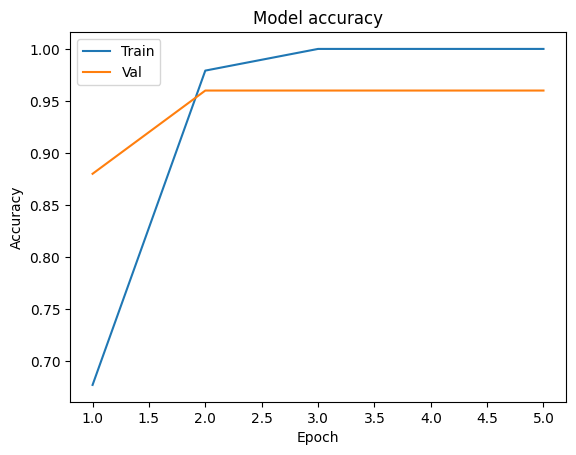

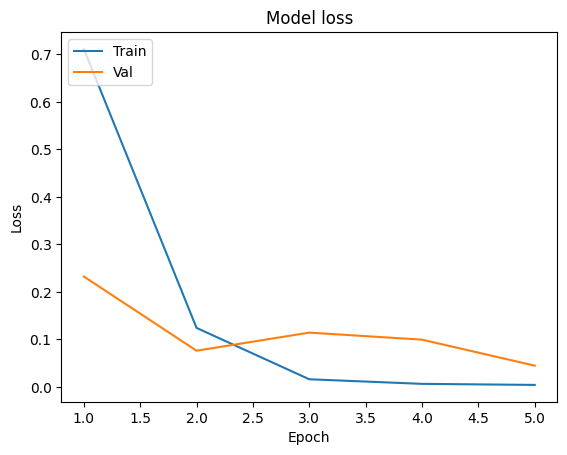

In [54]:
plot_learningCurve(history, 5)

In [55]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 59, 29, 16)        80        
                                                                 
 dropout_30 (Dropout)        (None, 59, 29, 16)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 58, 28, 32)        2080      
                                                                 
 dropout_31 (Dropout)        (None, 58, 28, 32)        0         
                                                                 
 flatten_10 (Flatten)        (None, 51968)             0         
                                                                 
 dense_20 (Dense)            (None, 64)                3326016   
                                                                 
 dropout_32 (Dropout)        (None, 64)              

In [56]:
model.save_weights('model.h5')

In [57]:
testX = np.array([[
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,13.952567,4.249724,2.527333,-5.409995,-10.950509,-12.736808,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,8.216389,5.280360,6.470113,-13.611813,-23.182785,-16.695789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,7.767200,5.611929,6.253044,-12.808754,-17.648222,-14.810780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,7.370362,5.079319,6.347465,-11.965900,-16.869978,-20.032492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,7.715310,4.155621,6.317726,-16.428761,-17.050875,-15.725938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,7.881013,4.186670,6.144070,-13.446540,-13.740369,-15.490369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,8.524879,4.271578,6.615993,-13.516587,-5.040089,-11.051071,9.084549,4.001487,6.367239,-7.355814,-10.082934,-7.333158,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,8.800302,3.362159,6.504236,-8.876846,-6.230131,-22.180132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,8.134988,2.746485,6.514914,-16.681761,-13.780928,-32.486542,0,0,0,0,0,0,10.254257,6.224337,8.455833,-6.530878,-13.936038,-18.016371,0,0,0,0,0,0],
    [0,0,0,0,0,0,7.893073,2.658744,5.947619,-23.272852,-23.198483,-41.946198,0,0,0,0,0,0,8.419959,5.309003,6.562475,-15.141280,-15.959386,-19.693125,0,0,0,0,0,0],
    [0,0,0,0,0,0,6.678409,3.502672,5.770662,-29.881226,-37.117558,-37.447361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,6.197261,3.502281,6.016867,-29.120848,-32.971867,-26.784777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,6.201666,3.656353,6.162067,-20.974396,-17.812176,-13.796858,0,0,0,0,0,0,6.393508,4.383246,7.006106,15.910370,21.221390,19.068649,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,6.047100,3.728672,6.208570,-10.385201,15.892621,32.621910,6.181096,4.576465,6.997590,15.424735,25.214361,30.243340,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,6.689670,3.718995,6.352200,21.943645,30.859713,28.230528,7.568999,3.734650,6.336351,24.176458,23.177486,19.308949,0,0,0,0,0,0],
    [0,0,0,0,0,0,6.756936,2.974996,6.085878,15.058789,28.332273,25.371532,7.100714,2.803586,5.256223,21.762081,33.566154,35.344673,7.761410,1.600375,5.355376,15.817078,19.660923,15.001101,0,0,0,0,0,0],
    [0,0,0,0,0,0,6.986620,2.287321,6.194528,19.794146,39.830635,33.717720,6.207091,1.920210,5.329789,27.869570,51.368126,50.604393,5.195462,-0.161790,3.307606,12.584986,24.421221,23.404194,0,0,0,0,0,0],
    [0,0,0,0,0,0,7.274265,1.934399,5.838885,24.971752,35.326973,32.629410,7.511321,2.016713,5.106946,38.457718,57.748947,50.584206,7.773062,1.236347,3.898364,19.297207,42.847214,34.810684,0,0,0,0,0,0],
    [0,0,0,0,0,0,8.152082,0.735103,5.745378,25.260988,30.784748,20.397715,7.598560,0.735593,4.897916,36.708290,40.289875,49.770779,5.907531,0.773901,5.522585,25.298033,24.282854,19.241486,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,6.490103,1.481722,4.067307,37.272137,40.245831,44.665112,7.840597,0.931173,3.339880,15.187518,18.708496,14.329185,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,5.897269,0.657285,3.317606,35.131943,35.755493,27.644312,5.806628,0.279364,2.684311,11.948812,23.762138,21.988840,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,5.678131,0.147839,3.063548,21.822975,20.383823,19.169857,5.539487,-0.493183,3.439726,17.970325,14.869340,18.709799,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,5.539316,0.021644,2.998916,16.125114,11.858723,12.524509,5.048274,-0.478946,3.008445,15.395230,11.963598,22.704348,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,4.877439,-0.337739,2.307023,10.759722,5.924069,6.684182,4.588142,-0.679850,2.659321,17.746691,11.029400,14.320434,0,0,0,0,0,0],
    [0,0,0,0,0,0,6.270644,0.956739,4.998600,-7.852917,-11.921509,-13.588535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,5.436295,1.256562,5.260251,-11.766024,-16.661034,-15.210032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,5.389453,1.856024,5.257956,-12.978321,-24.376022,-23.530657,4.393661,1.621573,4.334895,-6.836424,-19.629246,-8.739183,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,4.871344,1.873962,5.166535,-19.388491,-22.114351,-18.190914,4.234851,1.824427,4.136209,-6.337778,-10.129951,-6.084620,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,4.840881,1.591652,4.868794,11.090357,26.831984,31.532314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,5.342162,1.276335,4.787768,24.233213,40.522690,34.607246,4.182187,0.885812,3.085227,12.914112,37.122292,17.253429,4.153934,0.733384,3.131540,11.404458,28.944052,11.225662,0,0,0,0,0,0],
    [0,0,0,0,0,0,5.616482,1.290794,4.550498,25.847130,45.030083,47.194202,4.493757,1.312263,3.723777,11.661476,35.028019,32.352718,4.647297,1.090271,3.238101,8.312797,23.558950,21.119343,0,0,0,0,0,0],
    [0,0,0,0,0,0,5.956159,0.592108,4.683023,35.554607,44.968601,54.801357,0,0,0,0,0,0,5.337568,1.943664,4.613310,16.171715,23.293169,9.094886,0,0,0,0,0,0],
    [0,0,0,0,0,0,7.604311,1.995201,5.021271,40.279049,16.905844,12.930675,0,0,0,0,0,0,10.701224,-4.566400,0.278547,7.134822,-50.204227,-138.932571,0,0,0,0,0,0],
    [0,0,0,0,0,0,5.903653,-1.634187,6.870910,9.443080,-15.010967,-13.054314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,9.055454,1.457847,5.344152,-9.673894,13.515572,16.765368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,7.811357,2.246756,5.980661,12.548841,11.778852,10.738168,4.365787,1.870901,5.217771,38.208569,8.134138,-36.259247,8.860351,2.989388,3.141908,48.683605,31.648640,25.767378,0,0,0,0,0,0],
    [0,0,0,0,0,0,6.808356,2.962502,4.951216,8.990260,20.927866,36.376049,8.975663,-0.041771,1.358307,-19.213202,-54.612484,-80.438911,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0.888476,-0.155872,3.187116,26.567259,86.461220,72.609428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,3.540016,0.440885,3.896799,45.334312,10.789911,-54.195641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,10.512943,2.589950,0.272325,-25.930822,-51.096405,-114.381203,12.161925,4.218072,2.763889,5.436157,14.229702,33.977779,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,4.481536,2.017825,4.246423,24.208988,16.421852,-20.309095,8.378955,4.199608,5.586026,-11.059976,-8.673635,-8.930796,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,6.964401,3.101523,5.233665,7.655895,8.418730,8.588311,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,6.844166,3.032157,5.351068,7.271446,7.189135,6.127219,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]]);

In [ ]:
# testX = tf.expand_dims(testX,0);
# testX = np.reshape(testX, (60, 30, 1))
# testX = tf.expand_dims(testX,0);

In [58]:
testX.shape

(1, 60, 30)

In [59]:
Y = model.predict(testX)
print(Y)

1/1 [==============================] - 0s 89ms/step
[[2.6692278e-36 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]


2022-11-18 13:09:38.650194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [60]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/fx/5gyl_pgs2094_xlx9szcscp00000gn/T/tmpzz6kmn91/assets


INFO:tensorflow:Assets written to: /var/folders/fx/5gyl_pgs2094_xlx9szcscp00000gn/T/tmpzz6kmn91/assets
2022-11-18 13:10:03.451524: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-18 13:10:03.451547: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-18 13:10:03.452140: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/fx/5gyl_pgs2094_xlx9szcscp00000gn/T/tmpzz6kmn91
2022-11-18 13:10:03.453711: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-18 13:10:03.453719: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/fx/5gyl_pgs2094_xlx9szcscp00000gn/T/tmpzz6kmn91
2022-11-18 13:10:03.457896: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-11-18 13:10:03.458880: I tensorflow/cc/saved_model/load

13317376

In [61]:
X_train[0]

array([[[ 0.42941239],
        [ 0.42941239],
        [-1.03869284],
        ...,
        [-1.01276576],
        [-1.28956827],
        [-1.29678447]],

       [[-1.18717419],
        [-1.01281749],
        [ 0.42941239],
        ...,
        [-1.43911781],
        [-1.49507949],
        [-0.13244423]],

       [[ 0.43478617],
        [ 0.43478617],
        [-0.3701168 ],
        ...,
        [-0.57530583],
        [-0.63626359],
        [-0.48773576]],

       ...,

       [[-0.01390086],
        [-0.01390086],
        [-0.01390086],
        ...,
        [-0.01390086],
        [-0.01390086],
        [-0.01390086]],

       [[-0.01301963],
        [-0.01301963],
        [-0.01301963],
        ...,
        [-0.01301963],
        [-0.01301963],
        [-0.01301963]],

       [[-0.01301963],
        [-0.01301963],
        [-0.01301963],
        ...,
        [-0.01301963],
        [-0.01301963],
        [-0.01301963]]])

In [62]:
X_train[0].shape

(60, 30, 1)

In [63]:
testX.shape

(1, 60, 30)

In [64]:
testX[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])